#따릉이-날씨 정보 관계 분석

## 필요한 함수 / 라이브러리 import

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

##데이터 불러오기

In [54]:
# filename = "SeoulBikeData.csv"

df = pd.read_csv('/content/drive/MyDrive/KDT/MINI Project/SeoulBikeData.csv', encoding='cp949')
print(df)

            Date  Rented Bike Count  Hour  Temperature(캜)  Humidity(%)  \
0     01/12/2017                254     0            -5.2           37   
1     01/12/2017                204     1            -5.5           38   
2     01/12/2017                173     2            -6.0           39   
3     01/12/2017                107     3            -6.2           40   
4     01/12/2017                 78     4            -6.0           36   
...          ...                ...   ...             ...          ...   
8755  30/11/2018               1003    19             4.2           34   
8756  30/11/2018                764    20             3.4           37   
8757  30/11/2018                694    21             2.6           39   
8758  30/11/2018                712    22             2.1           41   
8759  30/11/2018                584    23             1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(캜)  \
0                  2.2              2000 

## 데이터 전처리

In [55]:
#누락 데이터 확인
df.isnull().sum()

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(캜)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(캜)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

In [56]:
#기본 정보 출력
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(캜)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(캜)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [57]:
# Descriptive Statistics
descriptive_stats = df.describe()
print(descriptive_stats)

       Rented Bike Count         Hour  Temperature(캜)  Humidity(%)  \
count        8760.000000  8760.000000     8760.000000  8760.000000   
mean          704.602055    11.500000       12.882922    58.226256   
std           644.997468     6.922582       11.944825    20.362413   
min             0.000000     0.000000      -17.800000     0.000000   
25%           191.000000     5.750000        3.500000    42.000000   
50%           504.500000    11.500000       13.700000    57.000000   
75%          1065.250000    17.250000       22.500000    74.000000   
max          3556.000000    23.000000       39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(캜)  \
count       8760.000000       8760.000000               8760.000000   
mean           1.724909       1436.825799                  4.073813   
std            1.036300        608.298712                 13.060369   
min            0.000000         27.000000                -30.600000   
25%           

## 계절별 분석

In [58]:
# Seasonal Analysis
seasonal_analysis = df.groupby('Seasons')['Rented Bike Count'].mean()
print(seasonal_analysis)

Seasons
Autumn     819.597985
Spring     730.031250
Summer    1034.073370
Winter     225.541204
Name: Rented Bike Count, dtype: float64


## 상관관계 분석

<ipython-input-64-c74332fb959a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=df.corr()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 52892 (\N{HANGUL SYLLABLE KAELS}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52892 (\N{HANGUL SYLLABLE KAELS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


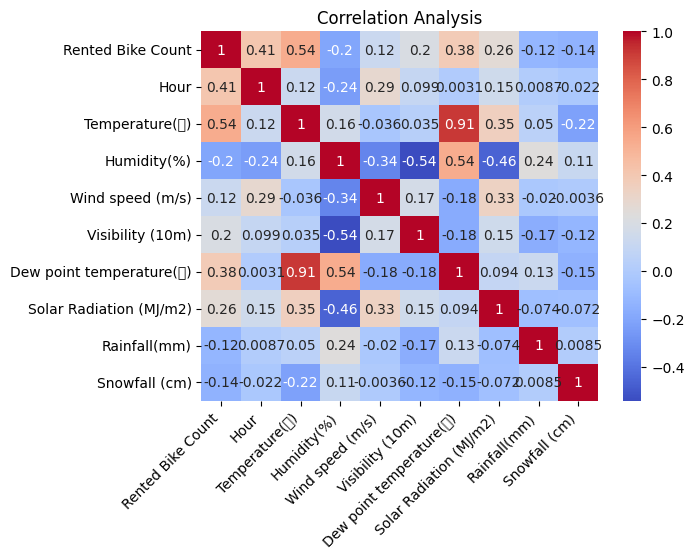

'\nDark blue represents a strong negative correlation(close to -1)\nDark red represents a strong positive correlation(close to 1)\n'

In [64]:
#Correlation Analysis
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title('Correlation Analysis')
plt.show()

'''
Dark blue represents a strong negative correlation(close to -1)
Dark red represents a strong positive correlation(close to 1)
'''

## Holiday vs. Non-Holiday분석

In [60]:
# Holiday vs. Non-Holiday Analysis
holiday_analysis= df.groupby('Holiday')['Rented Bike Count'].mean()
print(holiday_analysis)

'''result shows the average number of rented bike counts when it's a holiday or not a holiday '''

Holiday
Holiday       499.756944
No Holiday    715.228026
Name: Rented Bike Count, dtype: float64


"result shows the average number of rented bike counts when it's a holiday or not a holiday "

## 관계 그래프 시각화

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 52892 (\N{HANGUL SYLLABLE KAELS}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 52892 (\N{HANGUL SYLLABLE KAELS}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 52892 (\N{HANGUL SYLLABLE KAELS}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52892 (\N{HANGUL SYLLABLE KAELS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


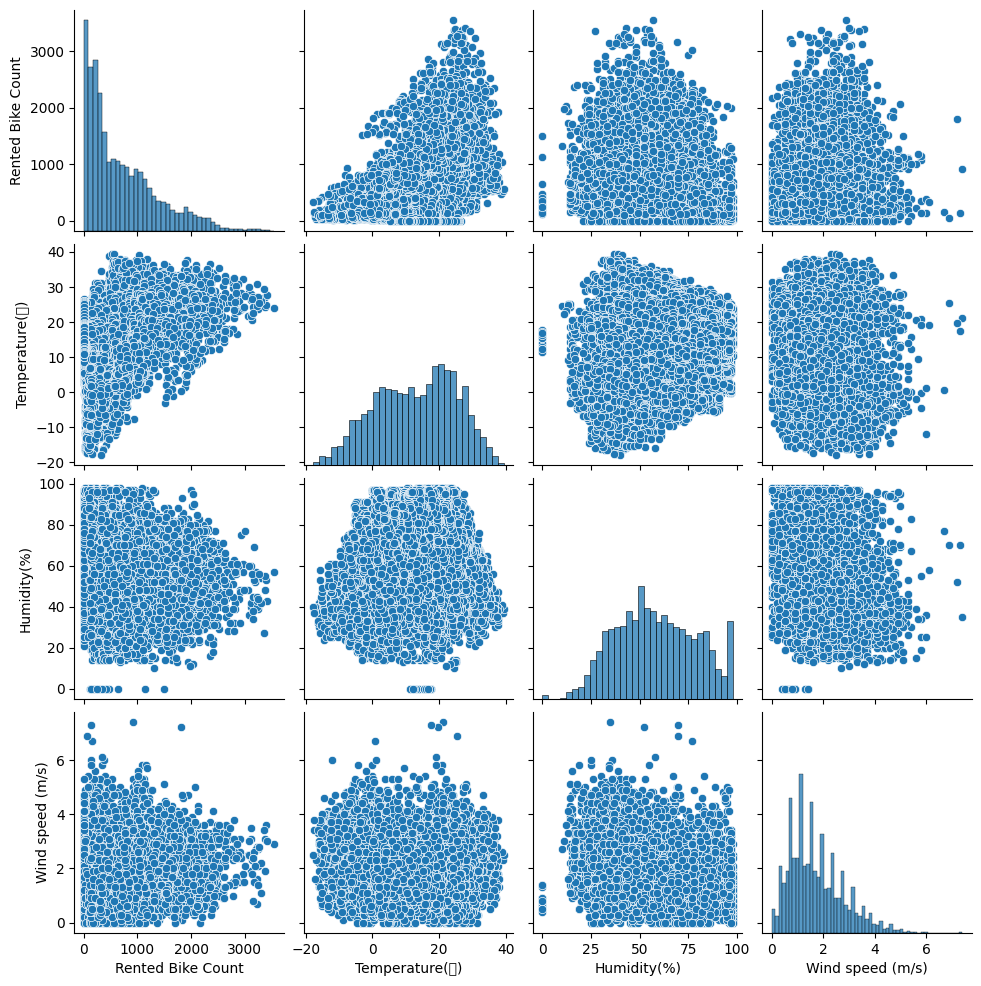

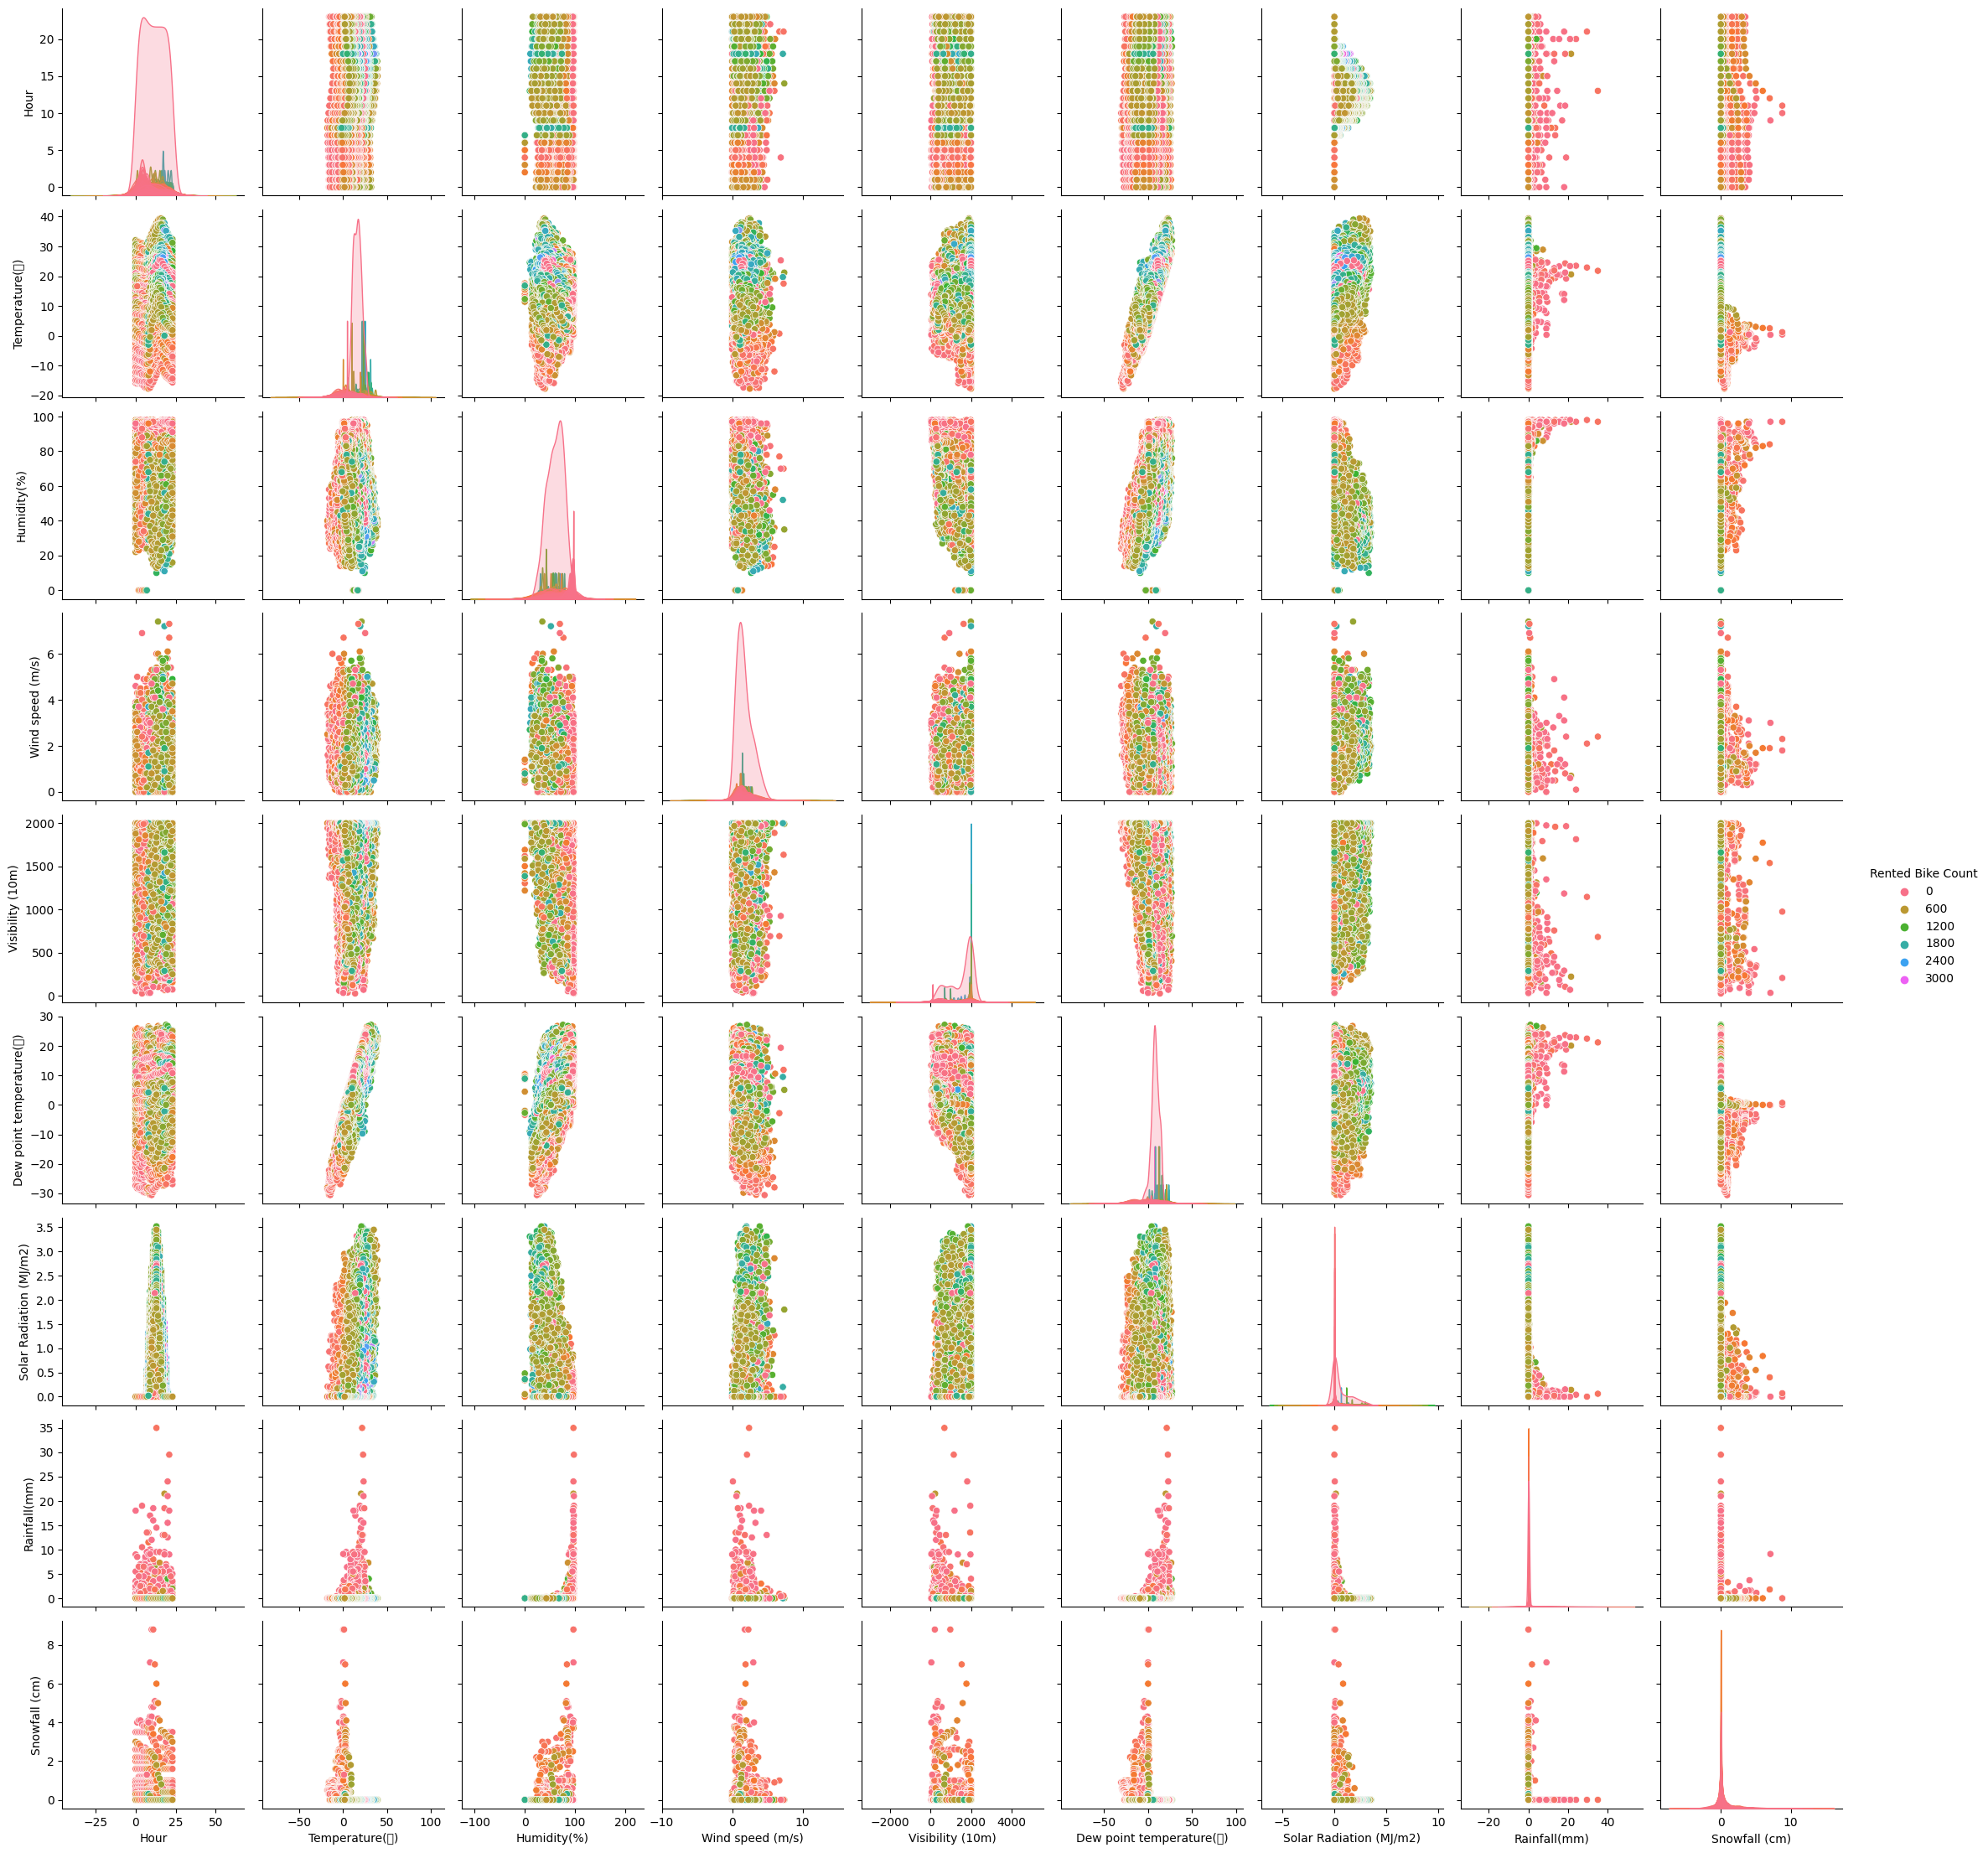

In [62]:

'''
인자로 전달되는 데이터프레임의 열(변수)을 두 개씩 짝 지을 수 있는 모든 조합에 대해서 표현

3개의 열이라면 3행 x 3열의 크기로 모두 9개의 그리드를 만든다.
각 그리드의 두 변수 간의 관계를 나타내는 그래프를 하나씩 그리며
같은 변수끼리 짝을 이루는 대각선 방향으로는 히스토그램을 그린다.
서로 다른 변수 간에는 산점도를 그린다.

대각선 방향으로는 하나의 열의 히스토그램을 나타낸다.
대각선 기준 위 아래는 사실 축이 전환된 것 뿐 보여주는 결과는 같다.
'''

sns.pairplot(df[['Rented Bike Count', 'Temperature(캜)', 'Humidity(%)', 'Wind speed (m/s)']])
fig= sns.pairplot(df, hue='Rented Bike Count', palette='husl')
plt.show()